In [19]:
import psix
from tqdm import tqdm

# Replace name of the variable 'tumorname'
tumorname = 'BT920'

psix_object = psix.Psix()
psix_object.junctions2psi(
    sj_dir=f'/Users/cecileherbermann/Downloads/{tumorname}/SJ_tables/',
    intron_file=f'/Users/cecileherbermann/Downloads/annotation.tab.gz',
    tpm_file=f'/Users/cecileherbermann/Downloads/{tumorname}/{tumorname}_tpm_filtered.tab',
    save_files_in=f'/Users/cecileherbermann/Downloads/{tumorname}/results/'
)

psix_object.run_psix(
    latent=f'/Users/cecileherbermann/Downloads/{tumorname}/{tumorname}_PC.txt',
    n_jobs=25,
    n_random_exons=2000,
    n_neighbors=30
)

psix_object.compute_modules()
psix_object.plot_modules()
psix_object.save_psix_object(psix_dir=f'/Users/cecileherbermann/Downloads/{tumorname}/results')

psix_results = psix_object.psix_results

gene_list = []
score_list = []
for idx, row in tqdm(psix_results.iterrows()):
    gene = idx.split('_')[0]
    if gene in gene_list:
        continue
    else:
        gene_list.append(gene)
        score_list.append(row.psix_score)

with open(f'/Users/cecileherbermann/Downloads/{tumorname}/results/{tumorname}.rnk', 'w') as fh:
    for i in range(len(gene_list)):
        line = gene_list[i] + '\t' + str(score_list[i]) + '\n'
        fh.write(line)


Computing cell-cell metric...


100%|██████████| 327/327 [00:00<00:00, 23842.87it/s]

Successfully computed cell-cell metric
Computing Psix score in 578 exons



100%|██████████| 578/578 [00:33<00:00, 17.51it/s]


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


100%|██████████| 25/25 [03:36<00:00,  8.65s/it]


Successfully estimated p-values
Successfully computed neighbors


578it [00:00, 20348.57it/s]


Computing cell-cell metric...


100%|██████████| 576/576 [00:00<00:00, 31615.36it/s]

Successfully computed cell-cell metric
Computing Psix score in 1043 exons



100%|██████████| 1043/1043 [00:42<00:00, 24.81it/s]


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


100%|██████████| 25/25 [05:55<00:00, 14.20s/it]  


Successfully estimated p-values
Successfully computed neighbors


1043it [00:00, 17900.10it/s]


In [ ]:
import psix
psix_object = psix.Psix()

In [2]:
# Creating a Psix object with smart-seq2 data
psix_object.junctions2psi(
        sj_dir='/Users/cecileherbermann/Downloads/MGH42/SJ_tables/',
        intron_file='/Users/cecileherbermann/Downloads/annotation.tab.gz',
        tpm_file='/Users/cecileherbermann/Downloads/MGH42/rsem_gene_tpm.tab.gz',
        save_files_in='/Users/cecileherbermann/Downloads/MGH42/results'
    )

100%|██████████| 576/576 [00:14<00:00, 38.91it/s]


Obtaining PSI tables...
Reading TPM and transforming to mRNA counts...


100%|██████████| 576/576 [00:09<00:00, 63.17it/s]


removed 81 cells with all missing or "inf" mRNA values.
This can be the consequence of very shallow coverage in the cell.
Successfully processed RNA-seq data


In [31]:
psix_object = psix.Psix(psi_table = '/Users/cecileherbermann/Downloads/MGH61/results/psi.tab.gz',
                        mrna_table = '/Users/cecileherbermann/Downloads/MGH61/results/mrna.tab.gz')

In [32]:
psix_object.run_psix(latent='/Users/cecileherbermann/Downloads/MGH61/MGH61_PC.txt', n_jobs=25, n_random_exons=2000, n_neighbors=30)

Computing cell-cell metric...


100%|██████████| 508/508 [00:00<00:00, 29775.52it/s]

Successfully computed cell-cell metric
Computing Psix score in 1382 exons



100%|██████████| 1382/1382 [00:34<00:00, 39.82it/s]


Successfully computed Psix score of exons.
Estimating p-values. This might take a while...


100%|██████████| 25/25 [05:01<00:00, 12.06s/it]  


Successfully estimated p-values


Successfully computed neighbors


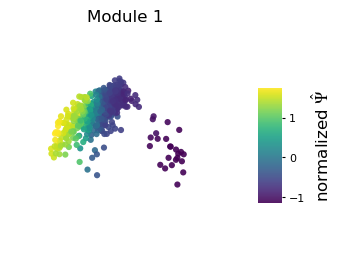

In [33]:
psix_object.compute_modules()
psix_object.plot_modules()
psix_object.save_psix_object(psix_dir = '/Users/cecileherbermann/Downloads/MGH61')

In [28]:
psix_object = psix.Psix(psix_object = '/Users/cecileherbermann/Downloads/MGH42/results/')

In [29]:
psix_results = psix_object.psix_results
from tqdm import tqdm
gene_list = []
score_list = []
for idx, row in tqdm(psix_results.iterrows()):
    gene = idx.split('_')[0]
    if gene in gene_list:
        continue
    else:
        gene_list.append(gene)
        score_list.append(row.psix_score)
        
with open('/Users/cecileherbermann/Downloads/MGH42/psix.rnk', 'w') as fh:
    for i in range(len(gene_list)):
        line = gene_list[i] + '\t' + str(score_list[i]) + '\n'
        fh.write(line)

1377it [00:00, 7435.32it/s] 
